### Galaxy environment

Some methods to test galaxy environment

In [152]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pylab import rcParams

import numpy as np

import pickle

import astroquery.vizier as vizier
import astroquery.ned  as ned
import astroquery.irsa as irsa

import astropy.units as u
import astropy.coordinates as coord

%matplotlib inline

## directory
rootdir = "/home/stephane/Science/Galaxies"
wdir    = "%s/products"%(rootdir)

import sys, os
sys.path.append("%s/master/notebooks"%(rootdir))

os.chdir(wdir)

## Settings
ROW_LIMIT = 5000
vizier.Vizier.ROW_LIMIT = ROW_LIMIT
irsa.Irsa.ROW_LIMIT = ROW_LIMIT

In [153]:
def get_cat(source, conesize = 0.5, survey = "2MASS"):
    "Get the catalogue data"
    
    c = coord.SkyCoord(ra=source[0]*u.deg, dec=source[1]*u.deg)
    
    #cat = "II/246" ## 2MASS ps
    # cat = "II/233" ## Ext 2MASS
    
    if survey == "GALEX":
        cat = "II/312/ais" ## Galex
        res = vizier.Vizier.query_region(c , radius=conesize*u.arcmin,catalog=cat)
    # res = ned.Ned.query_region(c , radius=conesize*u.arcmin)
    
    if survey == "WISE":
        cat ='allsky_4band_p3as_psd'
        res = irsa.Irsa.query_region(c , radius=conesize*u.arcmin,catalog=cat)
    
    if survey == "2MASS":
        cat = 'fp_psc'
        res = irsa.Irsa.query_region(c , radius=conesize*u.arcmin,catalog=cat)
        
    try:
        if len(res[0]) == ROW_LIMIT :
            print("### Number limit of objects reached...")
    except:
        print("## No source found ...")
        
    
    return(res)

In [154]:
## find index
def find_source(s , cat , tol = 5.0 / 3600. ):
    
    ids = np.where( (abs(cat["RAJ2000"] - s[0])) < tol )
    ids2 =  np.where( (abs(cat["DEJ2000"][ids] - s[1])) < tol )
    print(ids2)
    return(ids[ids2[0]])

In [155]:
def plot_field(tm ,s ,sexag = False):
    "plot the sources in the field"
    
    ral  = []
    decl = []
    if sexag:
        for val1, val2  in zip(tm['RAJ2000'],tm['DEJ2000']) :
            ra  = coord.Angle(val1, unit='hourangle')
            dec = coord.Angle(val2, unit=u.deg)
            ral.append(ra.degree)
            decl.append(dec.degree)
    else :
        for val1, val2  in zip(tm['RAJ2000'],tm['DEJ2000']) :
            ral.append(val1)
            decl.append(val2)
        
    fig = plt.figure(figsize=(10, 15))
    plt.plot(ral,decl, "k*")
    plt.plot(s[0], s[1], "r+")
    plt.grid("on")
    plt.show()

In [156]:
def plot_cmd(tm, s , inx ,ids):
    
    rcParams['figure.figsize'] = 14, 14
    f, axarr = plt.subplots(2, 2)

    # axarr[0,0].plot(tm['RAJ2000'][indx],tm['DEJ2000'][indx], "k*") 
    axarr[0,0].plot(tm['ra'],tm['dec'], "k*")
    axarr[0,0].plot(s[0], s[1], "r+")
    axarr[0,0].set_xlabel("RA")
    axarr[0,0].set_ylabel("Dec")
    
    # axarr[1,0].plot(tm['FUV'][indx] - tm['NUV'][indx], tm['FUV'][indx], "k*")
    # axarr[1,0].set_xlabel("FUV - NUV")
    # axarr[1,0].set_ylabel("FUV")
    #axarr[1,0].plot(tm['Jmag'][indx] - tm['Kmag'][indx], tm['Jmag'][indx], "k*")
    #axarr[1,0].plot(tm['Jmag'][ids] - tm['Kmag'][ids], tm['Jmag'][ids], "r+")
    axarr[1,0].set_xlabel("J-K")
    axarr[1,0].set_ylabel("J")
    
    #axarr[1,1].plot(tm['Jmag'][indx] - tm['Hmag'][indx], tm['Jmag'][indx], "k*")
    #axarr[1,1].plot(tm['Jmag'][ids] - tm['Hmag'][ids], tm['Jmag'][ids], "r+")
    axarr[1,1].set_xlabel("J-H")
    axarr[1,1].set_ylabel("J")
    
    
    plt.show()

## Getting the sources  ...
   ra     dec       clon          clat     err_maj ...  j_h   h_k    j_k   id
  deg     deg                                arcs  ...                       
------- ------- ------------ ------------- ------- ... ----- ------ ----- ---
  1.558  -6.393 00h06m13.89s -06d23m35.53s    0.12 ... 0.897  0.961 1.858   0
  1.554  -6.366 00h06m13.00s -06d21m57.42s    0.28 ... 0.916  0.683 1.599   1
  1.554  -6.353 00h06m12.97s -06d21m12.43s    0.12 ... 0.456  0.131 0.587   2
  1.598  -6.402 00h06m23.57s -06d24m05.99s    0.09 ... 0.709  0.271  0.98   3
  1.530  -6.424 00h06m07.18s -06d25m25.32s    0.13 ...  0.55  0.267 0.817   4
  1.590  -6.363 00h06m21.62s -06d21m47.34s    0.12 ... 0.294   0.09 0.384   5
  1.558  -6.349 00h06m13.97s -06d20m56.07s    0.15 ... 0.197  0.365 0.562   6
  1.600  -6.408 00h06m24.02s -06d24m27.77s    0.25 ...    --     --    --   7
  1.570  -6.344 00h06m16.76s -06d20m40.14s    0.23 ... 0.533     --    --   8
  1.508  -6.410 00h06m01.98s -06d24m

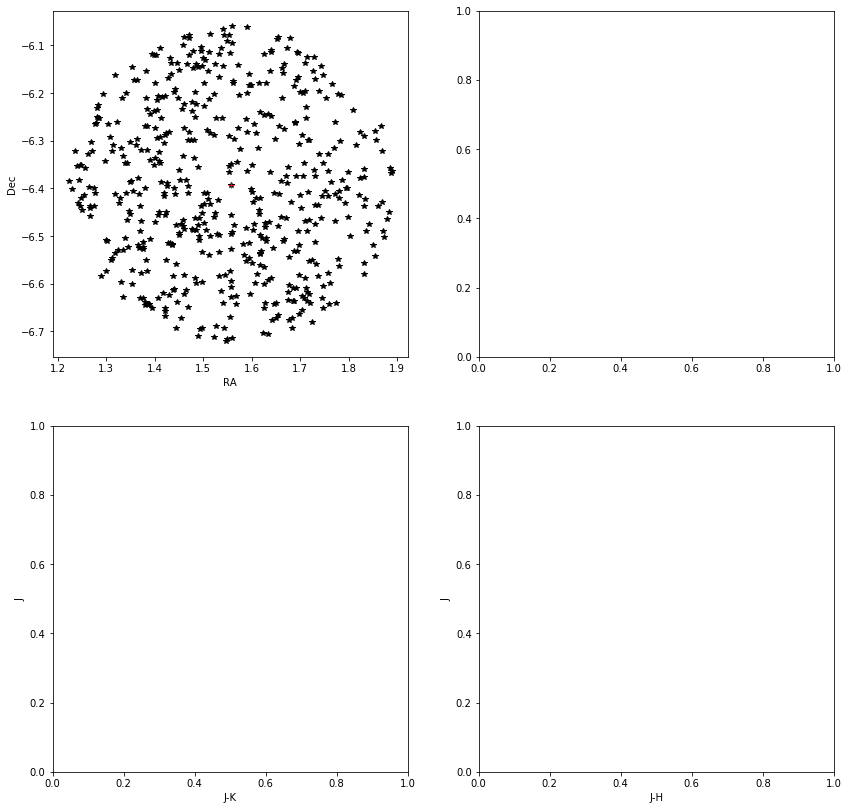

In [157]:
### Main

## 
s = [145.891068, 0.05370]
s = [1.55789 ,  -6.39315]

print("## Getting the sources  ...")
tm = get_cat(s, conesize = 20.0 , survey = "2MASS")
print(tm)
wi = get_cat(s, conesize = 20.0 , survey = "WISE")
print(wi)
ga = get_cat(s, conesize = 20.0 , survey = "GALEX")
print(ga[0])



# indx = np.where(tm[0]["Jmag"] < 100.)
# ids = find_source(s , tm[0] )
indx = range(len(tm[0]))

if len(tm)> 0:
    plot_cmd(tm, s , indx ,ids)